In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import re

In [2]:
# 関数の定義

def exec_process(root_dir_path):
    # フォルダの中のpng画像ファイルパスリストを取得
    # 画像ファイルがあるフォルダ名は"Z_7000um"の形式でその画像を取得したときのZ座標を示す
    # Z_7000um, Z_0umのようにZ座標ごとに分かれたフォルダの中の画像ファイルパスのリストを取得し"ファイルパス"とZ座標のカラムを持つDataFrameを作成
    # 画像をグレースケールで読み込み、その画像のリストを作成し"画像"カラムを追加
    # 画像の平均輝度を計算し"平均輝度"カラムを追加
    # 作成したDataFrameを返す
    folder_list = os.listdir(root_dir_path)
    df_list = []
    for folder in folder_list:
        path_list = glob.glob(f'{root_dir_path}/{folder}/*.jpg')
        df = pd.DataFrame()
        # 画像ファイル名の命名規則は"YYYYMMDD_HHMMSSFFF_cam1.png"とする
        df['timestamp'] = pd.to_datetime([re.search(r'(\d{8}_\d{9})', os.path.basename(path)).group(1) for path in path_list], format='%Y%m%d_%H%M%S%f')
        df['path'] = path_list
        df['Z'] = [int(folder.split('_')[1].replace('um', '')) for _ in range(len(path_list))]
        img_list = [cv2.imread(path, 0) for path in path_list]
#         df['img'] = img_list
        avg_brightness_list = [np.mean(img) for img in img_list]
        df['avg_brightness'] = avg_brightness_list
        df_list.append(df)
        df = pd.concat(df_list)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.sort_values('timestamp')
    return df

def plot_graph(df):
    # 指定したZ座標における時刻と平均輝度のグラフを描画
    # 作成したグラフを保存
    Z = df['Z'].unique()
    for z in Z:
        df_z = df[df['Z'] == z]
        plt.plot(df_z['timestamp'], df_z['avg_brightness'])
        plt.xlabel('Time')
        plt.ylabel('Average Brightness')
        plt.title(f'Z={z}um')
        plt.show()
#         plt.savefig(f'Z_{z}um.png')
        plt.close()

In [3]:
df = exec_process(r"C:\work\git_repo\python\analysis_note\data\signal_collection\test01")
print(df.head())

                timestamp                                               path  \
0 2024-06-10 00:12:23.455  C:\work\git_repo\python\analysis_note\data\sig...   
0 2024-06-10 00:12:23.455  C:\work\git_repo\python\analysis_note\data\sig...   
1 2024-06-10 00:12:24.555  C:\work\git_repo\python\analysis_note\data\sig...   
1 2024-06-10 00:12:24.555  C:\work\git_repo\python\analysis_note\data\sig...   
2 2024-06-10 00:12:25.455  C:\work\git_repo\python\analysis_note\data\sig...   

      Z  avg_brightness  
0  7000      248.557484  
0  8400      248.557484  
1  7000      248.609356  
1  8400      248.609356  
2  7000      248.534473  


In [9]:
from datetime import datetime as dt

first_time = dt.strptime("2024-06-10 00:12:23.555", "%Y-%m-%d %H:%M:%S.%f")
last_time = dt.strptime("2024-06-10 00:12:28.555", "%Y-%m-%d %H:%M:%S.%f")

df_range_time = df[(df["timestamp"] >= first_time) & (df["timestamp"] <= last_time)]
df_range_time.head()

,timestamp,path,Z,avg_brightness
1,2024-06-10 00:12:24.555,C:\work\git_repo\python\analysis_note\data\sig...,7000,248.609356
1,2024-06-10 00:12:24.555,C:\work\git_repo\python\analysis_note\data\sig...,8400,248.609356
2,2024-06-10 00:12:25.455,C:\work\git_repo\python\analysis_note\data\sig...,7000,248.534473
2,2024-06-10 00:12:25.455,C:\work\git_repo\python\analysis_note\data\sig...,8400,248.534473
3,2024-06-10 00:12:26.455,C:\work\git_repo\python\analysis_note\data\sig...,7000,248.558350


In [ ]:
# DataFrame 1
df1 = pd.DataFrame({
   'A': ['A0', 'A1', 'A2'],
   'B': ['B0', 'B1', 'B2'],
}, index=[0, 1, 2])

# DataFrame 2
df2 = pd.DataFrame({
   'C': ['C0', 'C1', 'C2'],
   'D': ['D0', 'D1', 'D2'],
}, index=[0, 1, 2])

df3 = df1.join(df2)
ｄｆ


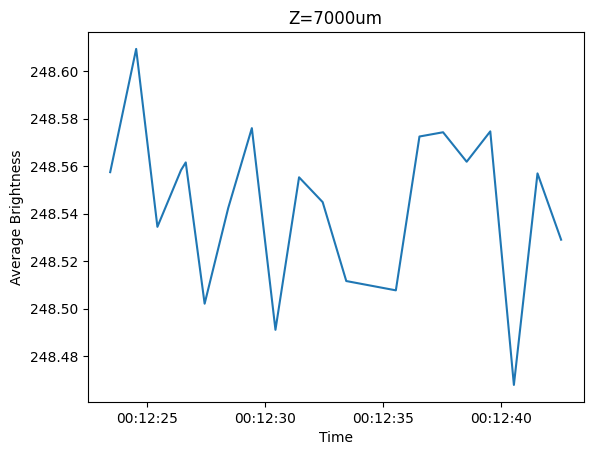

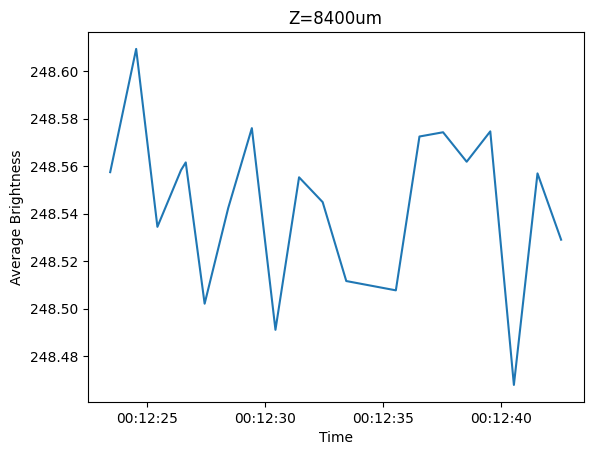

In [15]:
plot_graph(df)